<a href="https://colab.research.google.com/github/dakshpat/Final-Project-Phys-240-/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FINAL PROJECT: CELL SURVIVAL MODELING**

The code below shows a plot of the MTSH model with with D0 and n parameters. This is to play around with different parameters values to see what the graph looks like

**MTSH MODEL:** 

$ \frac{S}{S_0} = ne^\frac{D}{D_0} $

n = is the number of targets

$D_0 $ = dose at which there is on average one hit per target. Graphycally it is the slope of the linear portion of the plot

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import matplotlib as mpl

In [159]:
#Paramenters

n = 6
d0 = 54 #units of Gy 

Creating an x-range, and calculating the y values. 

In [160]:
x_range = np.arange(0, 10, .5)
y_range = -n*np.exp(x_range/d0)


The next bit is to just plot the data

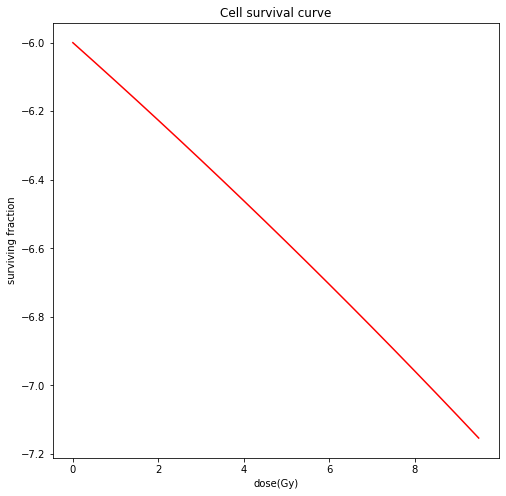

In [161]:
plt.plot(x_range, y_range, 'r')
plt.title("Cell survival curve")
plt.xlabel("dose(Gy)")
plt.ylabel("surviving fraction")
plt.show

mpl.rcParams['figure.figsize'] = [8, 8]

**Part:2**

The code below is to read a file that has all the data and then plots the data.

<function matplotlib.pyplot.show>

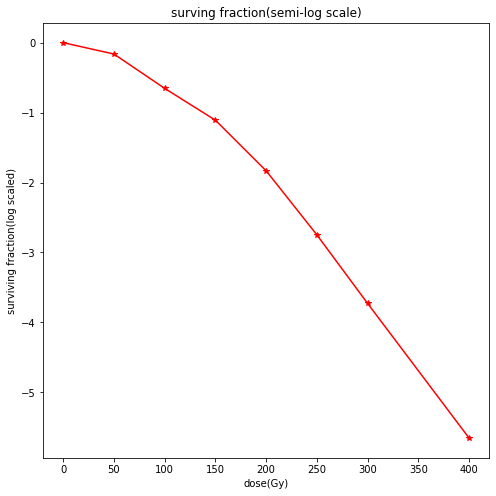

In [225]:
x_data, y_data =np.loadtxt('https://raw.githubusercontent.com/dakshpat/Final-Project-Phys-240-/main/data1.txt', delimiter = ',', unpack= True )

plt.plot(x_data, np.log(y_data), 'r*-')
plt.title("surving fraction(semi-log scale)")
plt.xlabel("dose(Gy)")
plt.ylabel("surviving fraction(log scaled)")
plt.show

Input an estimate of cutoff dose where the plot above starts to look linear. And picking all data point to the right of that estimate.

<function matplotlib.pyplot.show>

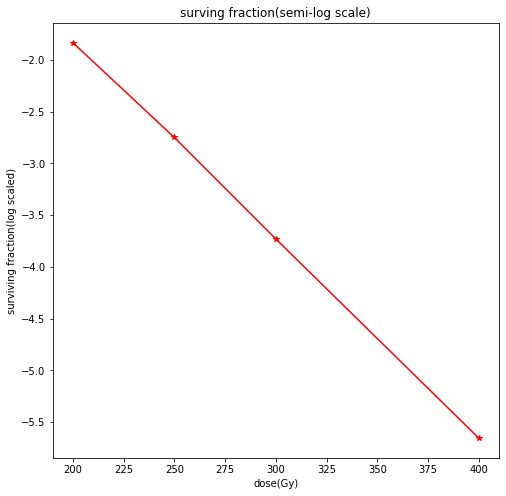

In [226]:
#input for the cutoff dose estimate 

cutoff_dose = 175

x_interpol = []
y_interpol = []

counter = 0
for i in x_data: 
  if (i > cutoff_dose):
    x_interpol.append(i)
    y_interpol.append(np.log(y_data[counter]))
    counter +=1
  else: 
    counter +=1

#plots the data you want for the linear interpolation
plt.plot(x_interpol, y_interpol, 'r*-')
plt.title("surving fraction(semi-log scale)")
plt.xlabel("dose(Gy)")
plt.ylabel("surviving fraction(log scaled)")
plt.show

Interpolation part, takes the specificed data above and linearly interpolates, turing on the fill value so that we can extrapolate to the x & y-intercept

<function matplotlib.pyplot.show>

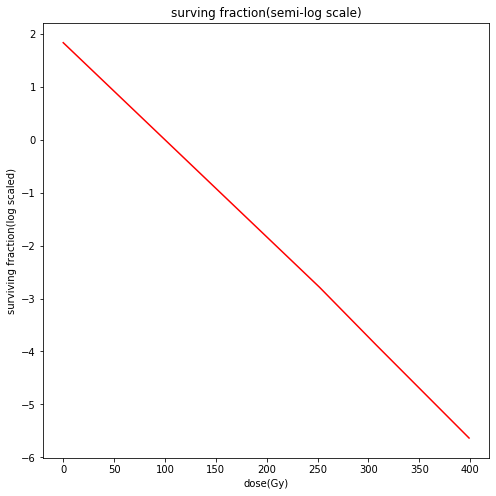

In [227]:
#interpolation 

xmax = max(x_interpol)        #gives me the upper bound of the x values I need
x_new = np.arange(0, xmax)
f_linear = interpolate.interp1d(x_interpol, y_interpol, kind='linear', fill_value='extrapolate')
y_new = f_linear(x_new)

plt.plot(x_new, y_new, 'r-')
plt.title("surving fraction(semi-log scale)")
plt.xlabel("dose(Gy)")
plt.ylabel("surviving fraction(log scaled)")
plt.show

Calculating the parameter values, as well as compleated model

In [228]:
#finding parameter D0
sampling = 200 #specifing where to take the slope
slope = (y_new[sampling]-y_new[sampling-1])/(x_new[sampling]-x_new[sampling-1])
D_0 = - 1/slope
print("D0 equals: %5.2fGy" %D_0)

#finding parameter n 
n = np.exp(f_linear(0))
print("n equals: %5.2f" %n)

#finding parameter Dq
Dq = D_0*f_linear(0)
print("Dq equals: %5.2fGy" %Dq)

print("Using the MTSH model the data approxmatily fits the function: S=%5.2f*e^(-D/ %5.2f)" %(n,D_0))

D0 equals: 54.57Gy
n equals:  6.25
Dq equals: 100.00Gy
Using the MTSH model the data approxmatily fits the function: S= 6.25*e^(-D/ 54.57)


**Part:3**

Modeling an Elkind sutton experiment where a initial conditioning dose is given and ploting the data. 

<function matplotlib.pyplot.show>

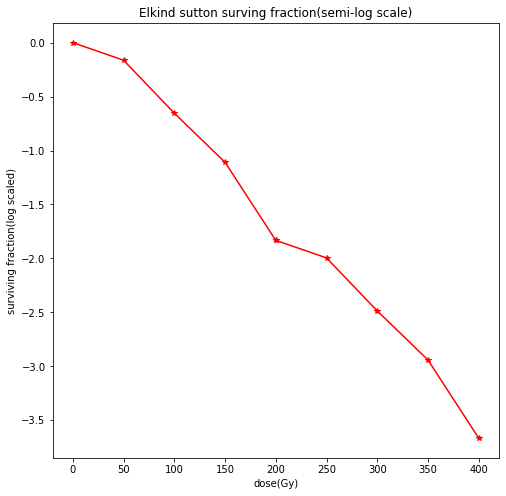

In [207]:
x_data, y_data =np.loadtxt('https://raw.githubusercontent.com/dakshpat/Final-Project-Phys-240-/main/data1.txt', delimiter = ',', unpack= True )


#input conditioning dose

c_dose = 200 #Gy
x_points = np.array([])
y_points = np.array([])

counter = 0
for i in x_data: 
  if (i <= c_dose):
    x_points = np.append(x_points, i)
    y_points = np.append(y_points, y_data[counter])
    counter +=1
  else: 
    counter +=1

for i in x_points:
  x_points = np.append(x_points, c_dose + i)

dose_afterRest = y_points[len(y_points)-1] * y_points
y_points = np.append(y_points, dose_afterRest)

plt.plot(x_points, np.log(y_points), 'r-*')
plt.title("Elkind sutton surving fraction(semi-log scale)")
plt.xlabel("dose(Gy)")
plt.ylabel("surviving fraction(log scaled)")
plt.show

In [233]:
cutoff_dose = 300  #estimate where the linear portion starts

x_inter = np.array([])
y_inter = np.array([])

counter = 0
for i in x_points: 
  if (i >= cutoff_dose):
    x_inter = np.append(x_inter, i)
    y_inter = np.append(y_inter, y_points[counter])
    counter +=1
  else: 
    counter +=1

xmax = max(x_inter)        #gives me the upper bound of the x values I need
x_new = np.arange(0, xmax)
f_linear = interpolate.interp1d(x_inter, y_inter, kind='linear', fill_value='extrapolate')
y_new = f_linear(x_new)

#finding parameter D0
sampling = 200 #specifing where to take the slope
slope = (y_new[sampling]-y_new[sampling-1])/(x_new[sampling]-x_new[sampling-1])
D_01 = - 1/slope

#finding parameter n 
n1 = np.exp(f_linear(0))

if (abs(n-n1) <= 0.5):
  print("Repair of the cell damadge is complete, so sufficient time has passed")
elif (n == 1 ):
  print("repair has not begun yet")
else: 
  print("insufficient time has passed for repair to complete")

insufficient time has passed for repair to complete
